In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bankdata = pd.read_csv(r'/Users/esrayanar/Desktop/Python/bank_note_data.csv')

In [3]:
bankdata.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
bankdata.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
x = bankdata.iloc[:,0:4]
y = bankdata.Class

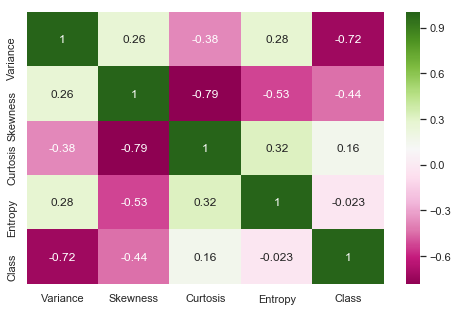

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white") 
sns.set(style="whitegrid", color_codes=True)

plt.subplots(figsize=(8, 5))
sns.heatmap(bankdata.corr(), annot=True, cmap="PiYG")

In [7]:
bankdata_feature_names = list(x)
bankdata_feature_names

['Variance', 'Skewness', 'Curtosis', 'Entropy']

In [13]:
bankdata_target_names = list(y)
bankdata_target_names

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [10]:
import sklearn.metrics as metrics
def draw_roc(predicted,actual,pop_type):

    fpr, tpr, threshold = metrics.roc_curve(actual, predicted)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic: ' + pop_type)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return()

In [11]:
def get_variable_importance(attribute_names,feature_importances):
    my_formatted_list = [ '%.2f' % elem for elem in feature_importances ]

    dictionary = dict(zip(attribute_names, my_formatted_list))

    data_sorted = {k: v for k, v in sorted(dictionary.items(),reverse=True, key=lambda x: x[1])}
    return(data_sorted)

In [15]:
from sklearn import  linear_model

regr = linear_model.LinearRegression()
regr = regr.fit(x_train, y_train)

probs = regr.predict(x_train)
draw_roc(probs,y_train,'Train')print(get_variable_importance(list(x_train),regr.coef_))

SyntaxError: invalid syntax (<ipython-input-15-ed0468eae2fc>, line 7)

In [14]:
probs

NameError: name 'probs' is not defined

In [ ]:
regr.coef_[0]

In [ ]:
regr.intercept_

In [ ]:
sqrs = (y_train-probs) ** 2
SS_Residual = sqrs.values.sum()

orig_mean_sqr = (y_train-np.mean(y_train))**2

SS_Total = orig_mean_sqr.values.sum()
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print (r_squared, adjusted_r_squared)

In [ ]:
sqrs.values.sum()

In [ ]:
probs = regr.predict(x_test)
draw_roc(probs,y_test,'Test')